# Computer Science for Physics and Chemistry: Homework
This exercise is about the modeling of the diffusion of particles in physics or chemistry.
It is composed of two parts, one simulating the diffusion in one dimension and one in
a plane.

#### Preliminary issues: importing libraries

In [0]:
import random
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

## First part
### Diffusion in 1 dimension: the drunk walker

#### Question 1

In [0]:
def final_position1D(p,N):
  position=0
  for i in range(N):
    rand_num = np.random.uniform(0,1)
    #print(rand_num)
    if rand_num <= p:
      position += 1
    else:
      position -= 1
  return position

##### Testing

In [0]:
print(final_position1D(0.5,200))
print(final_position1D(0.75,100))

-10
44


* Description of script: \\
The function above with arguments *p (probability)* and *N (number of steps)* will calculate the final position of a random walker. At the beginning, the position is set to 0. Then for each step, random value in the range [0,1] is generated. If it is less (more) than the probability *p* of a random walker to go one step ahead, then we will increment (decrement) the position. At the end, the final position of a random walker is returned.
* Modules and functions used: \\
In order to deal with *randomness*, the *uniform* method from *numpy.random* is used: uniform(0,1) will generate floating point numbers within the range [0,1]. \\
* Testing: \\
After the function You can see the testing in order to be sure of the results it produces. The outputs are quite random which is perfectly OK.

#### Question 2

In [0]:
p=0.5 # probability to move forward
N=1000 # number of steps
times=100
positions=np.zeros(times) # initializing an array of size 'times' filled with 0s
for i in range(times):
  positions[i]=final_position1D(p,N)
print('positions = ' + str(positions))
print('mean (or expected value) = ' + str(positions.mean()) )

positions = [ 32.   6. -26. -12.  12.  18.  16.  20. -32.  34. -42.   0.  10.  -4.
 -18. -26.  12. -44. -40. -30.   4.  76. -22.  22.  50.   8.  16.  10.
   6.   8.  -6.  20.  24.  26. -34.  38. -14.  22. -48. -56. -22. -28.
  -4.  38.  -4. -42.  30.  44.  22. -24.  48.   8.  30.   6. -34.  18.
  30.   4.   4.  20. -10.   6. -50.   2. -38.   6. -20.  -6. -38.  40.
 -26. -16. -50. -64.  -8.  14.  26.  -4. -32.  40.  -6.  60.  30.  62.
 -12.  -4. -18.   4.  18.  18. -10.  -8. -38.  -6.   6. -34. -22.   2.
  32.  20.]
mean (or expected value) = 0.46


* Description of script: \\
As the question asks, the function *final_position()* is called 100 times with the arguments p=0.5 and N=1000.
* Modules and functions used:
 * The *zeros()* method of *numpy* module: used to store each time the final position of a walker. The numpy array of size 'times' is used and initialized with 0s using this method. 
 * *mean()* method of *numpy* module: used to calculate the mean of numpy array *positions*.
* Testing: \\
The testing of the function *final_position* can be seen here much more clearly, since the numpy array *positions* presents the randomness of the values.
* Results and Analysis: \\
Theoretically the expected final position for probability=0.5 should be 0 (which is the initial position of a walker), because the probability of moving forward and moving backward is the same. Our expectation matches with the theory, since the mean (or expected value) of *positions* array shows the value close to 0.

#### Question 3

Standard deviation sigma1000 = 28.339167242528493
Shapiro process:  (0.9920783638954163, 0.8268753886222839)


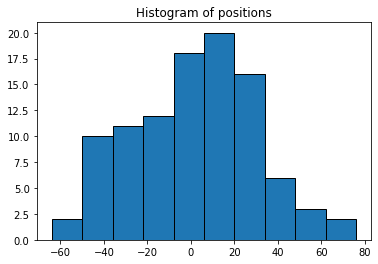

In [0]:
plt.hist(positions, edgecolor='black')
plt.title('Histogram of positions')
print("Standard deviation sigma1000 =", positions.std())
print("Shapiro process: ", sc.shapiro(positions))

* Description of script: \\
As the question asks, the result is represented as histogram. In addition, standard deviation is calculated for the *positions* array that we got above and Shapiro process is applied.
* Modules and functions used:
 * The *hist()* method of *matpotlib* module: used to plot histogram.
 * The *std()* method of *numpy* module: used to find standard deviation.
 * The *shapiro()* method of *scipy.stats* module: used to apply Shapiro process.
* Results and Analysis: \\
From the histogram, our data seems to follow a normal distribution. But to be certain about that the Shapiro process is applied: p-value > 0.05, which is OK to say that the distribution is Gaussian.

#### Question 4

steps = 20
positions = [  0.   0.   4.   0.  -2.  -2.   6.   6.  -2.  -4.  -2.  -4.   6.   0.
   8.  -4.   8.   0.   2.  -2.  -2.  -4.  -2.   6.  -2.  -4.  -2.   6.
  -2.  -6.  -4.  -6. -10.   8.   0.   0.   0.  -2.  -4.  -6.  -8.  -6.
   8.  -2.  -4.   2.   0.   2.   4.   2.  -8.  -4.   2.   0.   6.  -6.
   6.   0.   2.  -6.  -4.   6.   2.   4.   2.  -8.   0.   0.  -4.   4.
   6.  -2.  -4.   6.   6.  -2.  -2.   0.   6.   2.   2.   0.   6.  -4.
   2.  -2.   2.  -4.  -6.   8.  -4.   8.  -6.   2.  -2.  -2.   8.  -6.
  -4.  -8.]
mean (or expected value) = -0.2
Standard deviation sigma(20) = 4.512205669071391
Shapiro process:  (0.9524775743484497, 0.0012124391505494714)

steps = 50
positions = [ -2.  -6.  -4. -10.  -2.  -6.   6.   2.   2.   4.   0.  -4.   2.  -2.
   8.  12.   6.  -8.  12.   0. -10.   2.   0.   0.  -4.  -6.  -8.   0.
  -4.  -2. -10.   8.  14.   0.  22.  12.   2.  -8.   6.   0.   0.  -6.
   8.   8. -12.  16.   0.   4.   2.   4.   4.   2.   2.  16.   8. -10.
  -4.   0.  -4.  

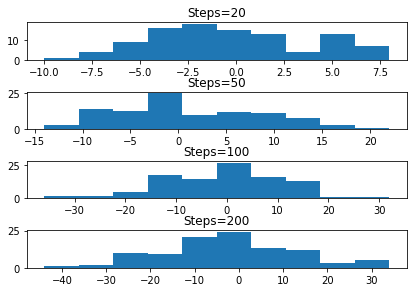

In [0]:
p=0.5 # probability to move forward
steps=np.array([20,50,100,200]) # number of steps
stdevs=[None]*len(steps)
times=100
positions=np.zeros((len(steps),times)) # initializing an array of size 'times' filled with 0s
for i in range(len(steps)):
  for j in range(times):
    positions[i][j]=final_position1D(p,steps[i])

# Printing resulting positions, expected values, standard deviations and Shapiro process
for i in range(len(steps)):
  print("steps = " + str(steps[i]))
  print('positions = ' + str(positions[i]))
  print('mean (or expected value) = ' + str(positions[i].mean()) )
  stdevs[i]=positions[i].std()
  print("Standard deviation sigma("+str(steps[i])+") =", stdevs[i])
  print("Shapiro process: ", sc.shapiro(positions[i]))
  print()

# Plotting histograms
fig, axs = plt.subplots(len(steps))
fig.tight_layout()
for i in range(len(steps)):
  axs[i].title.set_text('Steps=' +str(steps[i]) )
  axs[i].hist(positions[i])

It is the same question than Question 2 except the fact that we should do the same process for different values of steps. We created a numpy array that will hold all these values and did the same process as before for each value.

##### Standard deviation fitting

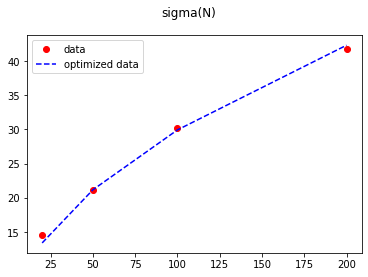

In [0]:
# Test function with coefficients as parameters 
def test(x, a):
    return a*x**.5

sigma=3*steps**.5+np.random.normal(size = len(steps))
param, param_cov = curve_fit(test, steps, sigma)

#print("Square root function coefficients: "+str(param)) 
#print("Covariance of coefficients: "+str(param_cov)) 

# ans stores the new S-data according to  
# the coefficients given by curve-fit() function 
ans = param[0]*steps**.5

# plotting
plt.suptitle("sigma(N)")
plt.plot(steps, sigma, 'o', color ='red', label ="data")
plt.plot(steps, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.show()

* Description of script: \\
The story here is all about fitting the standard deviation sigma(N). In the Question 4, we get different values of sigma according to different values of N (i.e. steps). Looking at scatter plot, it looks like a square root function. So applying this, we get a normal fit.
* Modules and functions used:
 * *normal()* method of *np.random*: used to bring some noise to our **sigma** after providing it with input **steps**.
 * *curve_fit()* method from *scipy.optimize*: used to fit a function
 * *plot()* method from *matplotlib*: used to plot the data
* Results and Analysis: \\
Seems like our function is fitted in a proper way which means our assumption about square root function was correct.

#### Question 5

In [0]:
p=0.75 # probability to move forward
N=1000 # number of steps
times=100
positions=np.zeros(times) # initializing an array of size 'times' filled with 0s
for i in range(times):
  positions[i]=final_position1D(p,N)
print('positions = ' + str(positions))
print('mean (or expected value) = ' + str(positions.mean()) )

positions = [514. 512. 504. 516. 470. 492. 512. 486. 522. 502. 492. 478. 558. 490.
 492. 424. 476. 470. 464. 446. 516. 532. 514. 528. 458. 508. 484. 536.
 446. 516. 534. 490. 486. 460. 500. 466. 492. 460. 480. 520. 470. 516.
 484. 532. 490. 502. 504. 516. 444. 516. 484. 474. 556. 446. 524. 492.
 496. 512. 484. 476. 518. 508. 494. 484. 498. 494. 516. 496. 492. 482.
 544. 442. 484. 518. 518. 524. 512. 462. 470. 528. 534. 518. 456. 456.
 540. 490. 520. 490. 518. 564. 530. 472. 510. 470. 528. 442. 494. 534.
 522. 508.]
mean (or expected value) = 497.44


* Description of script: \\
The same question as Question 2 except the fact that p=0.75 this time.
* Modules and functions used:
 * The *zeros()* method of *numpy* module: used to store each time the final position of a walker. The numpy array of size 'times' is used and initialized with 0s using this method. 
 * *mean()* method of *numpy* module: used to calculate the mean of *positions* numpy array.
* Results and Analysis: \\
Theoretically the expected final position for probability=0.75 should be 500 for 1000 steps, because the walker will move 750 steps forward and 250 steps backward out of 1000 in total. Our expectation matches with the theory, since the mean (or expected value) of *positions* array shows the value close to 500.

## Second part
### Diffusion in 2 dimensions: diffusion of a dye in water

#### Question 1

##### Movements

In [0]:
def up(grid,i,j):
  grid[i][j] -= 1
  grid[i-1][j] += 1
  return (grid,i-1,j)

def left(grid,i,j):
  grid[i][j] -= 1
  grid[i][j-1] += 1
  return (grid,i,j-1)

def right(grid,i,j):
  grid[i][j] -= 1
  grid[i][j+1] += 1
  return (grid,i,j+1)

def down(grid,i,j):
  grid[i][j] -= 1
  grid[i+1][j] += 1
  return (grid,i+1,j)

##### Function to find the final position of a molecule walker in 2D

In [0]:
def final_position2D(p,N,lattice,i,j): # i and j are the positions of molecule (dye) in a lattice
  x=[] # list to store x coordinates where molecule moved
  y=[] # list to store y coordinates where molecule moved 
  x.append(j) # adding the initial x position
  y.append(i) # adding the initial y position
  for counter in range(N):
    nbDirections=0
    directions=[]
    if i-1>=0: # if molecule can go up
      nbDirections+=1
      directions.append(up)
    if j-1>=0: # if molecule can go left
      nbDirections+=1
      directions.append(left)
    if j+1<=19: # if molecule can go right
      nbDirections+=1
      directions.append(right)
    if i+1<=19: # if molecule can go down
      nbDirections+=1
      directions.append(down)
    #print("#Directions=", nbDirections)
    #print("directions possible", directions)
    rand_num = np.random.uniform(0,1)
    if rand_num > p: # will not stay in its position
      integ=random.randint(0,nbDirections-1) # choose some direction randomly
      (lattice,i,j)=directions[integ](lattice,i,j)
    #print(i,j)
    x.append(j)
    y.append(i)
  return (x,y)

##### Testing

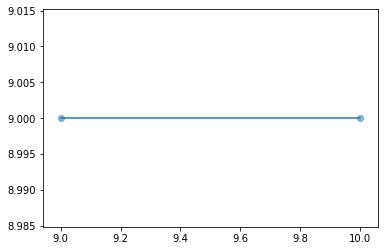

In [0]:
rows=20
columns=20
steps=1
p=0.3
lattice=np.zeros((rows, columns))
lattice[9][9]=1 # 1 molecule at the position (9,9)

(x,y)=final_position2D(p,steps,lattice,9,9)
#print(lattice)
#print(x)
#print(y)

# plotting
plt.scatter(x, y, alpha=0.5)
plt.plot(x,y)
plt.show()

* Description of scripts:
 * First of all we defined 4 small functions which will deal with the movements to 4 different directions: up, left, right and down. After updating the values in the lattice, the updated lattice and the new position of molecule are returned.
 * There is also another function which deals with finding the final position of a walker after N steps. For each step, we first try to identify which and how many directions the walker can move to. Depending on the random number between 0 and 1 and its relation with probability *p* that is given as a parameter, we decide whether we move or stay in our current position. At the end, the positions of all the visited cells of lattice are returned.
* Modules and functions used:
 * *random.uniform()* method from *numpy* module: used to generate probability (0<=p<=1).
 * *randint()* method from *random* module: in order to generate random integer in a given range. Used for finding the direction randomly from *directions* list, i.e. randomly generated integer will be a random index of our list which will correspond to some movement.
 * *zeros()* method of *numpy* module: used to initialize our lattice with 0s.
 * Methods *scatter()*, *plot()*, *show()* of module *matplotlib*: used to draw positions a molecule moved in a scattered plot.
* Testing, Results and Analysis: \\
We define a lattice of 20x20 with one molecule at the position (9,9) (the other cells will have value 0, because there's no molecule in those cells) and call the functions *final_position()* with the parameters p=0.3 and N=1 (only 1 step). After running it many times, we can see how randomly the molecule moves. This shows that the functions of movements work correctly from randomness point of view. In addition, printing lattice we can see the updated position of our molecule, i.e. value 1 in our lattice which indicates that only one molecule is in that cell. Printing the scatter plot gives another approach to visualize the direction the molecule moved. To see that, we can print the *x* and *y* lists that are returned by the function *final_position()*. But also note that the molecule can stay in its initial position (9,9) as well. This happens mostly when we increase the probability *p* which is the probability for a molecule to stay in its current position.

#### Question 2

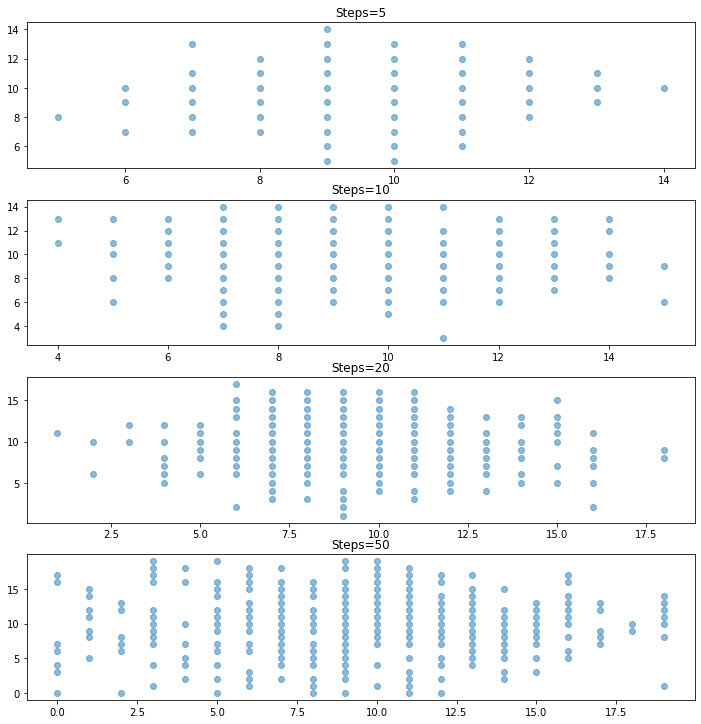

In [0]:
rows=20
columns=20
steps=[5,10,20,50]
p=0.2

# Plotting histograms
fig, axs = plt.subplots(len(steps),figsize=(10,10))
fig.tight_layout()

for i in range(len(steps)):
  lattice=np.zeros((rows, columns))
  lattice[9][9]=100
  lattice[9][10]=100
  lattice[10][9]=100
  lattice[10][10]=100

  for j in range(100):
    final_position2D(p,steps[i],lattice,9,9)
    final_position2D(p,steps[i],lattice,9,10)
    final_position2D(p,steps[i],lattice,10,9)
    final_position2D(p,steps[i],lattice,10,10)
  #print(lattice)
  x=[]
  y=[]
  for r in range(rows):
    for c in range(columns):
      if lattice[r][c] != 0:
        x.append(c)
        y.append(r)
  #print(x)
  #print(y)
  axs[i].title.set_text('Steps=' +str(steps[i]) )
  axs[i].scatter(x,y,alpha=0.5)

* Description of script: \\
This question was almost done in the testing part of question 1, except the fact that we will change some parameters. In our lattice we will place 100 molecules in 4 center cells (the positions (9,9) (9,10) (10,9) and (10,10)) and no molecules in the others. Furthermore we set p=0.2 and we work with different values of steps (5, 10, 20 and 50). \\
 **Note:** Sometimes from the plots it can be seen that there are less movements than the number of steps. This is because the molecule has a right even to stay at the current position.
* Modules and functions used: \\
The same than in Question 1
* Testing 
For each value of steps, we visualized the scattered plot. We also notice that increasing the number of steps we get a better spreadout of molecules.

#### Entropy

In physics or chemistry, we define the notion of entropy to quantify the neatness of a
system. For a discrete system, the entropy is calculated like this:
\begin{gather*}S=-k_{B}\sum_{i} P_{i} ln(P_{i})
\end{gather*}
where $k_{B}$ = 1.38$e^{−23}$ is the Boltzmann constant and $P_{i}$ is the average ratio of particles in the box i (number of particle in the box i divided by the total number of particles).

In [0]:
def find_P(p,N): # P is the average ratio of particles
  rows=20
  columns=20
  lattice=np.zeros((rows, columns))

  nbTotalParticles=400
  # the four boxes at the center with 100 particles
  lattice[9][9]=100
  lattice[9][10]=100
  lattice[10][9]=100
  lattice[10][10]=100

  for i in range(100):
    final_position2D(p,N,lattice,9,9)
    final_position2D(p,N,lattice,9,10)
    final_position2D(p,N,lattice,10,9)
    final_position2D(p,N,lattice,10,10)
  #print(lattice)
  P=lattice.flatten()
  #print(P)
  for i in range(nbTotalParticles):
    P[i] /= nbTotalParticles
  #print(np.sum(P))
  return P

I decided to write a function that would calculate for us a 1D array which will have values of the average ratio of a particle. The testing of this function will be seen later.

#### Question 3

In [0]:
def find_entropy(P):
  kB=1.38*10**(-23)
  sum=0
  for i in range(len(P)):
    if P[i] != 0:
      sum += P[i]*math.log1p(P[i]-1)
  S=-kB*sum
  return S

I also decided to separate the function that would find for us entropy according to the given formula; the given parameter is P which will be calculated thanks to the function *find_P()* that is defined above. The testing of this function will be seen later.

In [0]:
p=0.2
N=50
computations=25
P=find_P(p,N)
for i in range(1,computations):
  tmp=find_P(p,N)
  P=np.add(P,tmp)

# find average
for i in range(len(P)):
  P[i] /= computations
print(P)

print("Entropy =", find_entropy(P))

[0.     0.0002 0.0006 0.0002 0.0006 0.0008 0.0012 0.001  0.0011 0.0006
 0.001  0.0014 0.001  0.0006 0.0008 0.0003 0.0009 0.0002 0.0002 0.0002
 0.0001 0.0001 0.0003 0.0006 0.0011 0.0008 0.0014 0.0017 0.0018 0.0016
 0.0026 0.0015 0.0022 0.0014 0.0004 0.0011 0.0008 0.0004 0.0002 0.0004
 0.0003 0.0005 0.0007 0.0009 0.001  0.0015 0.0023 0.0023 0.0014 0.0017
 0.0014 0.0021 0.0015 0.0016 0.0013 0.0009 0.0012 0.0005 0.0002 0.0001
 0.0004 0.0005 0.0008 0.0013 0.0008 0.0015 0.0016 0.0022 0.0021 0.0032
 0.0038 0.0035 0.0024 0.0022 0.0017 0.001  0.0008 0.0009 0.0009 0.0002
 0.0005 0.0004 0.0008 0.0017 0.0019 0.0017 0.0025 0.003  0.0042 0.0043
 0.0033 0.0041 0.0031 0.0026 0.0019 0.0016 0.0009 0.0012 0.0011 0.0007
 0.0008 0.0015 0.002  0.0013 0.0022 0.0045 0.0033 0.004  0.0045 0.0052
 0.0046 0.0052 0.0046 0.004  0.0032 0.0021 0.0014 0.0014 0.0008 0.0008
 0.0008 0.0016 0.0018 0.0023 0.0027 0.0043 0.0044 0.005  0.0059 0.0068
 0.0051 0.0065 0.0052 0.0041 0.0053 0.0033 0.0021 0.0014 0.0018 0.0009
 0.001

* Description of script: \\
Here we run our function *find_P()* 25 times and then try to find the average value $P_{i}$ for each box. We take p=0.2 and N=steps=50. For each computation we find a new P matrix and each time those P matrices will be added and stored. At the end, the value for each cell will be divided by the number of computations to find an average. \\
The final step is about finding the entropy thanks to the function defined above. The found P matrix will be a parameter for this function.
* Modules and functions used:
 * *zeros()* method of *numpy* module: used to initialize our lattice with 0s.
 * *flatten()* method of *numpy* module: used to convert 2D array to 1D array. In our case that array is *P*.
 * *log1p()* method of *math* module: used to find ln in the formula of entropy.
 * *add()* method of *numpy* module: used to add two numpy arrays.
* Testing, Analysis and Results: \\
With the values p=0.2, N=50 and computations=25 we find an average P array which seems OK (essentially the values should be between 0 and 1). Then we find entropy based on that matrix.

#### Question 4

In [0]:
p=0.2
N=np.array([5,10,20,50]) # number of steps
S=[] # entropy list
computations=25
for i in range(len(N)):
  P=find_P(p,N[i])
  for j in range(1,computations):
    tmp=find_P(p,N[i])
    P=np.add(P,tmp)

  # find average
  for i in range(len(P)):
    P[i] /= computations
  S.append(find_entropy(P))

print("N="+str(N))
print("S="+str(S))

N=[ 5 10 20 50]
S=[5.017278262735841e-23, 5.89626969647348e-23, 6.780223873341999e-23, 7.830444781081433e-23]


* Description of script: \\
We did the same process than question 3 except the fact that we tried other values for steps. As a result, we have different values for entropies and this dependency will be plotted as a graph S(N) later.
* Modules and functions used: \\
The only new method is *plot()* of *matplotlib* which is known as a method to draw functions.

##### Fitting the variation of entropy

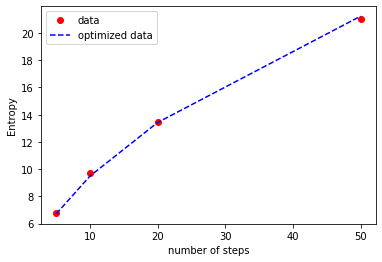

In [0]:
# Test function with coefficients as parameters 
def test(x, a): 
    return a * x**.5

S = 3 * N**.5 + np.random.normal(size = len(N))
param, param_cov = curve_fit(test, N, S)

#print("Square root function coefficients:") 
#print(param)
#print("Covariance of coefficients:") 
#print(param_cov)

# ans stores the new S-data according to  
# the coefficients given by curve-fit() function 
ans = param[0]*N**.5

# plotting
plt.plot(N, S, 'o', color ='red', label ="data") 
plt.plot(N, ans, '--', color ='blue', label ="optimized data")
plt.xlabel("number of steps")
plt.ylabel("Entropy")
plt.legend() 
plt.show() 

We were asked to find a mathematical function that fits the variation of entropy with respect to the number of time steps S(N). After drawing the scatter plot it looked like a square root function. After applying the *curve_fit()* method of *scipy.optimize*, we see that data is fitted well by that function.